# Case Study 1: How Does a Bike-Share Navigate Speedy Success?

## Project Descriptions:
As a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, me and my team wants to understand how casual riders and annual members use Cyclistic bikes.

| Columns name | Description |
| --- | --- |
| ride_id | Rider's Id |
| rideable_type	| Type of Vehicle the rider took|
| started_at | The location point where the cyclist pickup cycle |
| ended_at | The location point where the cyclist ended cycle journey |
| station_station_id | Etart station cycle pick point unique id |
| ended_station_id | Ended station cycle drop point unique id |
| start_station_name | Cycle journey start station name | 
| end_station_name | Cycle journey end station name |
| start_lat | Start station latitude |
| start_lng | Start station longitude |
| end_lat | End station Latitude |
| end_lng | End station Longitude |
| member_causual | Type of Cyclist member |

# Data sources used

Divvy Data - The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure). We have choosen 12 months data from April 2020 to March 2021.

To download data click in this link [Divvy Data](https://divvy-tripdata.s3.amazonaws.com/index.html)

# Business Task

- How do annual members and casual riders use Cyclistic bikes differently?

- Why would casual riders buy Cyclistic annual memberships?

- How can Cyclistic use digital media to influence casual riders to become members?

# Metrics


# Assumptions

# Data Tasks

# Recommendation for Action

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Code to combine all data company over the 12 Month in to single file of CSV format.

In [ ]:
# def myfunction(data):

#   df = pd.DataFrame()  
#   df_1 = pd.read_csv(data)
#   df = df + df_1
#   print(df_1)
#   return df


# dir = '/content/'
# opened = []

# df_2 = []
# for file in os.listdir(dir):
#   if file.endswith(".csv"):
#     # df_1.append(myfunction(file))
#     df1 = pd.read_csv(file, index_col= None, header = 0)
#     opened.append(df1)


# frame = pd.concat(opened, axis = 0, ignore_index = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/'blog in marathi/Capstone/divvy_tripdata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


### Sort data by Starting data.

In [ ]:
df = df.sort_values(by='started_at', inplace=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5DB63F4E4EB6A9CF,docked_bike,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,162,Pine Grove Ave & Waveland Ave,232.0,41.9359,-87.6784,41.9493,-87.6463,casual
1,1FD159E93F7BAFA1,docked_bike,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,72,Wabash Ave & 9th St,321.0,41.8604,-87.6258,41.8708,-87.6257,member
2,6D93A270684EC452,docked_bike,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,162,Spaulding Ave & Armitage Ave,506.0,41.9359,-87.6784,41.9171,-87.7102,casual
3,091D47E4F0FC5022,docked_bike,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,173,Clark St & Schiller St,301.0,41.8969,-87.6217,41.9080,-87.6315,member
4,07F785C9DDA3404C,docked_bike,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,321,Wabash Ave & 9th St,321.0,41.8708,-87.6257,41.8708,-87.6257,member


- Get the Number of Null values in each columns

In [ ]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    114151
start_station_id      114688
end_station_name      133248
end_station_id        133645
start_lat                  1
start_lng                  1
end_lat                 3981
end_lng                 3981
member_casual              2
dtype: int64

- Get the Summary of data

In [ ]:
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,3006373,3006373,3006373,3006373,2892222,2891685.0,2873125,2872728.0,3.006372e+06,3.006372e+06,3.002392e+06,3.002392e+06,3006371
unique,3006164,3,2685910,2675035,707,2462.0,706,1998.0,NaN,NaN,NaN,NaN,3
top,282A7A754D3C0B74,docked_bike,2020-10-09 17:08:37,2020-10-14 07:23:00,Streeter Dr & Grand Ave,35.0,Streeter Dr & Grand Ave,35.0,NaN,NaN,NaN,NaN,member
freq,2,2126078,11,13,28352,24064.0,29809,25454.0,NaN,NaN,NaN,NaN,1799134
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190409e+01,-8.764515e+01,4.190435e+01,-8.764543e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387650e-02,2.588931e-02,4.396224e-02,2.600856e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188224e+01,-8.765914e+01,4.188266e+01,-8.765966e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000e+01,-8.764182e+01,4.190068e+01,-8.764293e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.762775e+01,4.193120e+01,-8.762784e+01,NaN


- Get the columns info by knowing there datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006373 entries, 0 to 3006372
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_length         timedelta64[ns]
dtypes: float64(4), object(9), timedelta64[ns](1)
memory usage: 321.1+ MB


# Creating new columns

- Calculate the ride duration between started location and Ended location and name it as **ride_length**

In [ ]:
from datetime import datetime

format = '%H:%M:%S'
df['ride_length'] = pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])

- Get the week day using the Started at time and name it as **Weekday**

In [ ]:
df['WEEKDAY'] = df['started_at'].apply(lambda x: pd.to_datetime(x).weekday())

In [ ]:
df.drop(index=1234556, axis=1, inplace=True)

In [ ]:
# df.head(1)
df.columns

Index(['index', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'WEEKDAY'],
      dtype='object')

In [ ]:
# df.drop('index', axis=0, inplace=True)
df.reset_index(inplace=True)

### Mean of Ride_length

In [ ]:
# mean of ride_length
df['ride_length'].mean()

Timedelta('0 days 00:23:38.174281825')

### Get Max Ride Length

In [ ]:
df['ride_length'].max()

Timedelta('40 days 18:40:02')

In [ ]:
df['WEEKDAY'].mode()

0    5
dtype: int64

# Data Analysis

In [ ]:
df.groupby('start_station_name')['ride_id'].count().sort_values(ascending=False).head(20)

start_station_name
Streeter Dr & Grand Ave       28352
Clark St & Elm St             27909
Lake Shore Dr & Monroe St     24557
Theater on the Lake           23827
Lake Shore Dr & North Blvd    22252
Wells St & Concord Ln         21476
Indiana Ave & Roosevelt Rd    20892
Dearborn St & Erie St         20836
Broadway & Barry Ave          20776
Millennium Park               20635
Wells St & Elm St             20275
Clark St & Armitage Ave       20182
Wells St & Huron St           19750
Clark St & Lincoln Ave        19046
Columbus Dr & Randolph St     18952
Wabash Ave & Grand Ave        18618
St. Clair St & Erie St        18435
Michigan Ave & Oak St         18093
Desplaines St & Kinzie St     18073
Kingsbury St & Kinzie St      17785
Name: ride_id, dtype: int64

In [ ]:
df.groupby('end_station_name')['ride_id'].count().sort_values(ascending=False).head(20)

end_station_name
Streeter Dr & Grand Ave           29809
Clark St & Elm St                 27767
Theater on the Lake               24876
Lake Shore Dr & Monroe St         23977
Lake Shore Dr & North Blvd        22649
Wells St & Concord Ln             21939
Millennium Park                   21376
Broadway & Barry Ave              21327
Dearborn St & Erie St             21302
Indiana Ave & Roosevelt Rd        20309
St. Clair St & Erie St            20189
Wabash Ave & Grand Ave            19470
Wabash Ave & Roosevelt Rd         19437
Wells St & Elm St                 19007
Clark St & Armitage Ave           18968
Clark St & Lincoln Ave            18896
Wells St & Huron St               18674
Michigan Ave & Oak St             18624
Lake Shore Dr & Wellington Ave    18154
Larrabee St & Webster Ave         17861
Name: ride_id, dtype: int64

- Looking at top 20 **rider id** count grouping by *start station name" & "end station name" Most of the station name are repeatetive.

In [ ]:
df.head()

,level_0,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,WEEKDAY
0,0,0,5DB63F4E4EB6A9CF,docked_bike,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,162,Pine Grove Ave & Waveland Ave,232.0,41.9359,-87.6784,41.9493,-87.6463,casual,0 days 00:22:33,2
1,1,1,1FD159E93F7BAFA1,docked_bike,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,72,Wabash Ave & 9th St,321.0,41.8604,-87.6258,41.8708,-87.6257,member,0 days 00:08:10,2
2,2,2,6D93A270684EC452,docked_bike,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,162,Spaulding Ave & Armitage Ave,506.0,41.9359,-87.6784,41.9171,-87.7102,casual,0 days 00:21:39,2
3,3,3,091D47E4F0FC5022,docked_bike,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,173,Clark St & Schiller St,301.0,41.8969,-87.6217,41.9080,-87.6315,member,0 days 00:07:17,2
4,4,4,07F785C9DDA3404C,docked_bike,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,321,Wabash Ave & 9th St,321.0,41.8708,-87.6257,41.8708,-87.6257,member,0 days 00:00:33,2


- Groupby *Causual Member* and count *Rider Id*  distribution

In [ ]:
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
casual    1207236
member    1799134
Name: ride_id, dtype: int64

- See which station has maximum time difference.

In [ ]:
df.groupby("start_station_name")["ride_length"].max().sort_values(ascending=False).head(30)

start_station_name
Wabash Ave & Wacker Pl          40 days 18:40:02
Sedgwick St & Schiller St       38 days 16:03:53
Rush St & Superior St           37 days 16:43:21
Latrobe Ave & Chicago Ave       37 days 14:24:27
Ashland Ave & Division St       35 days 12:25:56
Shore Dr & 55th St              35 days 04:52:47
Kedzie Ave & Milwaukee Ave      33 days 04:37:00
Wood St & Augusta Blvd          32 days 01:24:36
State St & Randolph St          31 days 15:49:43
Franklin St & Monroe St         31 days 13:33:22
Millennium Park                 30 days 23:04:39
Wabash Ave & Grand Ave          30 days 19:35:05
South Shore Dr & 67th St        29 days 05:52:36
Woodlawn Ave & Lake Park Ave    28 days 18:37:13
Wolcott Ave & Polk St           28 days 15:51:00
Jeffery Blvd & 71st St          28 days 11:24:41
Indiana Ave & Roosevelt Rd      28 days 06:13:10
Clark St & Chicago Ave          27 days 15:32:07
LaSalle Dr & Huron St           27 days 00:55:44
Wentworth Ave & 35th St         26 days 22:14:26
S

In [ ]:
df.groupby("start_station_name")["ride_length"].count().sort_values(ascending=False).head(30)

start_station_name
Streeter Dr & Grand Ave           28352
Clark St & Elm St                 27909
Lake Shore Dr & Monroe St         24557
Theater on the Lake               23827
Lake Shore Dr & North Blvd        22252
Wells St & Concord Ln             21476
Indiana Ave & Roosevelt Rd        20892
Dearborn St & Erie St             20836
Broadway & Barry Ave              20776
Millennium Park                   20635
Wells St & Elm St                 20275
Clark St & Armitage Ave           20182
Wells St & Huron St               19750
Clark St & Lincoln Ave            19046
Columbus Dr & Randolph St         18952
Wabash Ave & Grand Ave            18618
St. Clair St & Erie St            18435
Michigan Ave & Oak St             18093
Desplaines St & Kinzie St         18073
Kingsbury St & Kinzie St          17785
Lake Shore Dr & Wellington Ave    17783
Wabash Ave & Roosevelt Rd         17666
Larrabee St & Webster Ave         17596
Michigan Ave & Lake St            16704
Dearborn Pkwy & Delaw

- Groupby time difference between ride end and ride start.

In [ ]:
df["time_diff"] = pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])

df['time_diff'] = df['time_diff']/np.timedelta64(1,'m')

In [ ]:
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
Lawndale Ave & 111th St      -806.127083
Cherry Ave & Blackhawk St     -68.445010
W Oakdale Ave & N Broadway    -38.788889
Wood St & Taylor St (Temp)    -32.275547
Throop St & Taylor St         -18.399991
                                 ...    
Latrobe Ave & Chicago Ave     489.532300
Ashland Ave & 63rd St         525.324346
Laramie Ave & Kinzie St       674.622941
Ellis Ave & 83rd St           679.460370
Kostner Ave & Lake St         793.385069
Name: time_diff, Length: 707, dtype: float64

In [ ]:
df[df['start_station_name'] == 'Lawndale Ave & 111th St']['ended_at']

2080891    2020-10-15 16:27:13
2097175    2020-10-16 19:43:46
2128814    2020-10-20 12:16:07
2158303    2020-10-22 22:45:31
2256512    2020-11-03 10:51:58
2355125    2020-11-09 14:59:55
2362771    2020-11-09 22:27:05
2464285    2020-11-23 13:02:59
2493679    2020-11-29 15:07:28
2494070    2020-11-29 15:56:05
2547629    2020-12-09 23:06:07
2572805    2020-11-25 22:50:26
2604440    2020-12-22 13:38:29
2657648    2021-01-09 13:46:24
2657805    2021-01-09 13:46:43
2751652    2021-02-21 00:17:57
2788335    2021-03-03 15:36:33
2796806    2021-03-05 12:24:38
2805387    2021-03-06 16:24:05
2805395    2021-03-06 16:24:10
2816989    2021-03-08 14:20:35
2828481    2021-03-09 17:10:02
2828531    2021-03-09 17:10:20
2860243    2021-03-13 13:52:35
2860255    2021-03-13 13:52:28
2873627    2021-03-15 02:22:59
2875779    2021-03-15 23:20:35
2896406    2021-03-20 14:23:12
2936298    2021-03-23 10:47:18
2952840    2021-03-25 17:52:15
2991551    2021-03-30 10:31:10
3003696    2021-04-01 17:20:21
Name: en

Groupby time difference between ride end and ride start for rideable type.

In [ ]:
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike     7.699155
classic_bike     18.033630
docked_bike      28.680089
Name: time_diff, dtype: float64

- Groupby time difference between ride end and ride start for member type

In [ ]:
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member    11.242770
casual    42.106151
Name: time_diff, dtype: float64

# Drop unwanted features

In [ ]:
df.columns

Index(['level_0', 'index', 'ride_id', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'ride_length', 'WEEKDAY',
       'time_diff'],
      dtype='object')

In [ ]:
df.drop(['start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)

# Treat Missing Values

In [ ]:
df.isnull().sum()

level_0                    0
index                      0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    114151
end_station_name      133248
member_casual              2
ride_length                0
WEEKDAY                    0
time_diff                  0
dtype: int64

In [ ]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")

In [ ]:
df.isnull().sum()

level_0               0
index                 0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         2
ride_length           0
WEEKDAY               0
time_diff             0
dtype: int64

# Data Visualization

### Get Month wise distribution of rider

In [ ]:
pd.to_datetime(df['started_at'][0]).to_period('M')

Period('2020-04', 'M')

In [ ]:
import datetime

df['Month'] = df['started_at'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month)

In [ ]:
mon = df.groupby('Month')['ride_id'].count().sort_values()
mon.index, mon.values

(Int64Index([2, 4, 1, 12, 5, 3, 11, 6, 10, 9, 8, 7], dtype='int64', name='Month'),
 array([ 49622,  84776,  96834, 131573, 200274, 228496, 259716, 343005,
        388653, 403969, 404859, 414595]))

<BarContainer object of 12 artists>

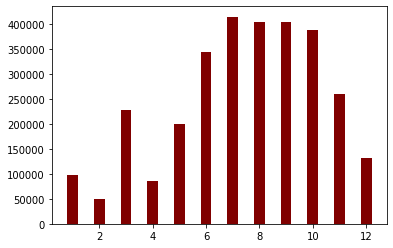

In [ ]:
plt.bar(mon.index, mon.values, color ='maroon', width = 0.4)

- Most of rider do riding **from June to November** 

In [ ]:
rideable_type = df.groupby('rideable_type')['ride_id'].count().sort_values()
rideable_type.index, rideable_type.values

(Index(['classic_bike', 'electric_bike', 'docked_bike'], dtype='object', name='rideable_type'),
 array([ 319873,  560422, 2126077]))

<BarContainer object of 3 artists>

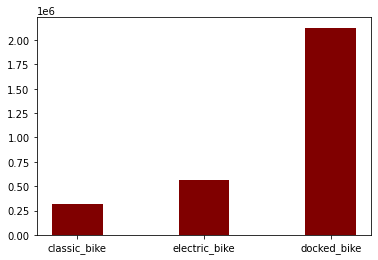

In [ ]:
plt.bar(rideable_type.index, rideable_type.values, color ='maroon', width = 0.4)

In [ ]:
df.columns

Index(['level_0', 'index', 'ride_id', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'end_station_name', 'member_casual',
       'ride_length', 'WEEKDAY', 'time_diff', 'Month'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

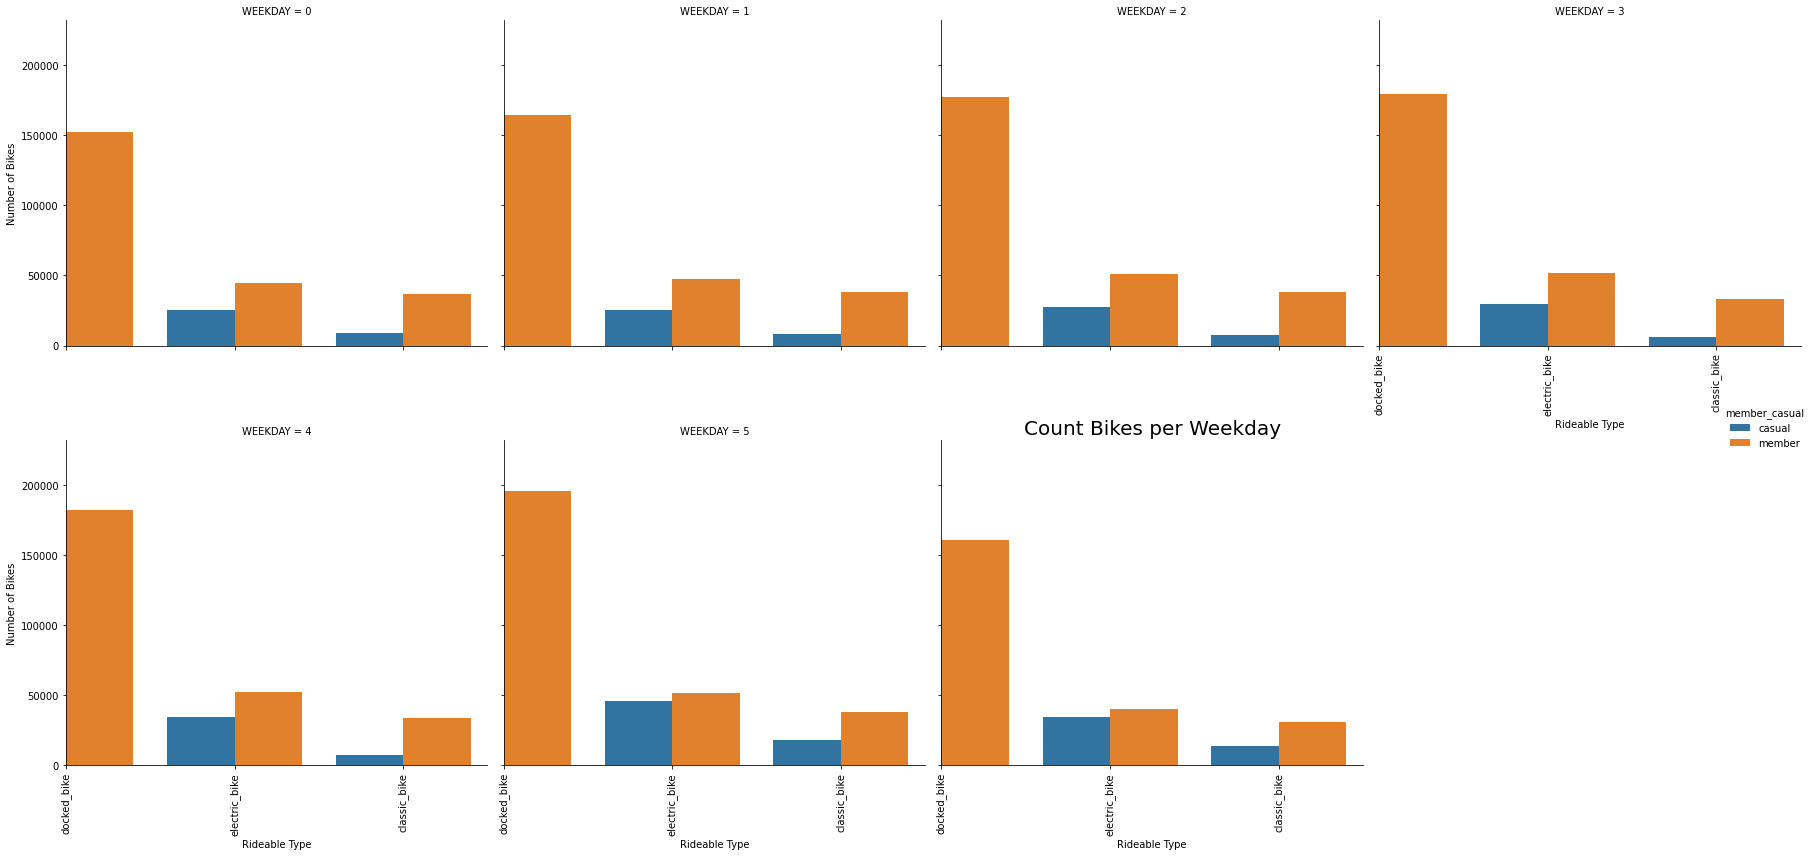

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'WEEKDAY', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

- Calculate the average ride_length for members and casual riders. Try rows = member_casual; Values = Average of ride_length

<BarContainer object of 2 artists>

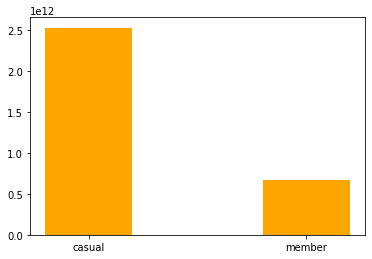

In [ ]:
mem_avg_length = df.groupby('member_casual')['ride_length'].mean()
plt.bar(mem_avg_length.index, mem_avg_length.values, color ='orange', width = 0.4)

- Calculate the average ride_length for users by day_of_week. Try columns = day_of_week; Rows = member_casual; Values = Average of ride_length.

# **Conclusion**
- Casual riders spent more time in bikes
- Popular spot is Lake Shore Dr & Monroe St
- Classic bikes are most rented
- Docked bikes spent most time cycling
- Rider take ride or membership to cycling between June to Oct for year 2020 to 2021
- Member riders love classic and electric bikes but casual riders prefer docked bikes
- Member riders have been in consistent usage for all days, same for casual riders
- Member riders spent less time biking than casual riders

- Download 40% of data analysis main dataframe into another dataframe, further Data analyze in datavisulization Tools

In [ ]:
df1 = df.sample(frac =.4)

In [ ]:
from google.colab import files

df1.to_csv('df1.csv')
files.download('df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>